In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from scipy.spatial.distance import chebyshev

# Load iris dataset
iris = pd.read_csv("iris.data",
                   header=None,
                   names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

Iris data a small dataset containing measurements of three different species of Iris flowers:<br>
 Iris setosa,<br> Iris virginica,<br> and Iris versicolor.<br>
 Feature	Description
SepalLength	Sepal length in cm
SepalWidth	Sepal width in cm
PetalLength	Petal length in cm
PetalWidth	Petal width in cm
Species	Iris flower species

The dataset contains 10 samples of Iris flowers from three different species: Iris setosa, Iris virginica, and Iris versicolor.

    SepalLength: The sepal length ranges from 4.6 to 6.3 cm, with an average of 5.28 cm.
    SepalWidth: The sepal width ranges from 3.0 to 4.4 cm, with an average of 3.65 cm.
    PetalLength: The petal length ranges from 1.3 to 1.9 cm, with an average of 1.58 cm.
    PetalWidth: The petal width ranges from 0.2 to 0.4 cm, with an average of 0.28 cm.
Source : github.com/zhikaichen99/UW-Notes 

In [9]:
def chebyshev_distances(X):
    n = X.shape[0]
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i, j] = np.max(np.abs(X[i] - X[j]))
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

In [11]:
# Scale the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.iloc[:, :4])

# Convert species to numerical values
iris_species = iris.iloc[:, 4]
iris_species_num = pd.factorize(iris_species)[0]


In [12]:
def kmeans_clustering(data, n_clusters, measure):
    if measure == "cosine":
        distance_matrix = 1 - cosine_similarity(data)
    elif measure == "euclidean":
        distance_matrix = euclidean_distances(data)
    elif measure == "manhattan":
        distance_matrix = manhattan_distances(data)
    elif measure == "chebyshev":
        distance_matrix = chebyshev_distances(data)
    else:
        raise ValueError("Invalid measure")

    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    kmeans.fit(distance_matrix)
    labels = kmeans.labels_
    score = silhouette_score(distance_matrix, labels)
    return labels, score


In [13]:
# Perform KMeans clustering with Euclidean distance
labels_euclidean, score_euclidean = kmeans_clustering(iris_scaled, 3, "euclidean")

# Perform KMeans clustering with Manhattan distance
labels_manhattan, score_manhattan = kmeans_clustering(iris_scaled, 3, "manhattan")

# Perform KMeans clustering with cosine similarity
labels_cosine, score_cosine = kmeans_clustering(iris_scaled, 3, "cosine")

labels_chebyshev, score_chebyshev = kmeans_clustering(iris_scaled, 3, "chebyshev")
labels_chebyshev, score_chebyshev = kmeans_clustering(iris_scaled, 3, "chebyshev")


d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

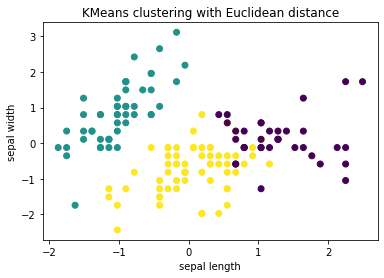

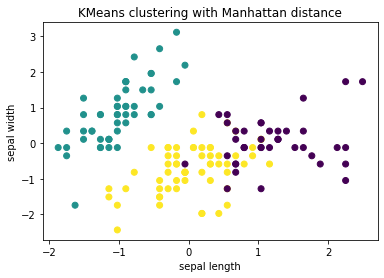

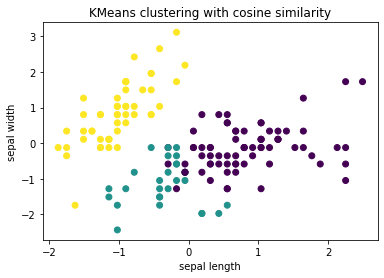

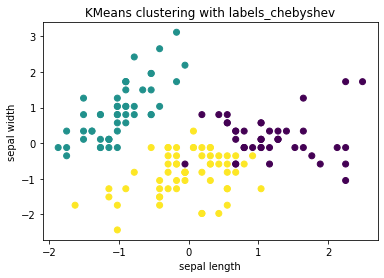

In [14]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_euclidean)
plt.title("KMeans clustering with Euclidean distance")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_manhattan)
plt.title("KMeans clustering with Manhattan distance")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_cosine)
plt.title("KMeans clustering with cosine similarity")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_chebyshev)
plt.title("KMeans clustering with labels_chebyshev")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()


The Wholesale_customers_data dataset, also known as the UCI Wholesale customers dataset,<br>
 is a widely used benchmark dataset in machine learning and data mining tasks.
 <br> It represents historical sales data of customers from a wholesale distributor.

Content

1) FRESH: annual spending (m.u.) on fresh products (Continuous)

2) MILK: annual spending (m.u.) on milk products (Continuous)

3) GROCERY: annual spending (m.u.)on grocery products (Continuous)

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

<!-- * الأطعمة المعلبة: الإنفاق السنوي (m.u.) على منتجات الأطعمة المعلبة -->

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous) 
<!-- * القناة: قناة شراء العملاء (Horeca أو البيع بالتجزئة) -->

7) CHANNEL: customer's Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)


This code loads the “Wholesale customers” dataset, scales the data using the StandardScaler, clusters the data using DBSCAN with eps=0.5 and min_samples=5, and visualizes the clustering result by plotting the values of “Grocery” and “Milk” on the x- and y-axis, respectively, with each point colored according to its cluster assignment. Finally, it calculates the silhouette score for the clustering result and prints it out.
Note that the silhouette_score() function expects the scaled data as input, not the original data, since the distance metric used for the silhouette score calculation is based on the scaled data. Also note that DBSCAN may not work well on all datasets, so it’s important to experiment with different values of eps and min_samples to find a good clustering result.

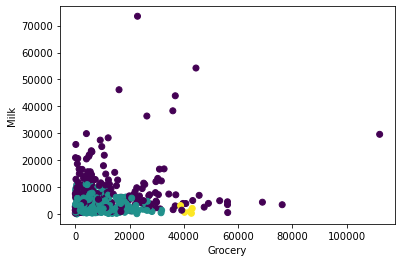

Silhouette score: 0.1958113956262888


In [3]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Wholesale_customers_data.csv')
X = df.iloc[:, 2:].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.5 , min_samples=5)
dbscan.fit(X_scaled)




# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

# Calculate the silhouette score for the clustering result
silhouette_score_ = silhouette_score(X_scaled, dbscan.labels_)
print("Silhouette score:", silhouette_score_) 
